# Algorithme supervisé : Régression linéaire

In [51]:
#librairie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pandas as pd
import numpy as np
import os

In [31]:
def import_table () : 
    """
    INPUT : path
    
    GOAL : This function ask the user to enter a rooth path for exploiting the dataset, return a pandas dataframe
    
    RETURN : The dataframe base
    
    """
    rooth = input("Veuillez rentrer un chemin de fichier: " )
    rooth = rooth + '/diamond_final.csv'
    diamond = pd.read_csv(rooth, index_col=0)
    return diamond

In [33]:
import_table()

Veuillez rentrer un chemin de fichier: /Users/david/projet-linux/Diamonds/Data


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,1,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,1,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,1,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,5,7,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
def modeling () :
    """
    GOAL : This function implement a regression linear model and return its results
    
    RETURN : Model's performances, with linear regression coefficients and a plot of difference between y_test 
    and y_predict
    
    """
    # Split between X and Y
    X = diamond.drop(labels='price',axis=1)
    y = diamond['price']

    # Split between train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)
    
    # Define linear regression model
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
    print('R2:',lr.score(X_train, y_train))
    
    coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
    predictions = lr.predict(X_test)
    
    # Evaluating the model
    plt.scatter(y_test,predictions)
    plt.xlabel('True Values [price]')
    plt.ylabel('Predictions [price]')
    plt.axis('equal')
    plt.axis('square')
    sns.histplot((y_test-predictions),bins=50)
    
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    return coeff_df

R2: 0.9092146333227378
MAE: 806.2346055309505
MSE: 1521247.6418676982
RMSE: 1233.3886823980906


,Coefficient
carat,11227.702885
cut,-127.855942
color,-332.241548
clarity,-504.513134
depth,-61.276369
table,-16.585843
x,-1085.487717
y,110.774746
z,-103.055126


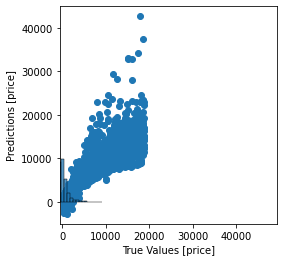

In [52]:
modeling()